# <center> Binary Modeling for Petrophysical Sonic Well Logs (DTC-DTS)  Analysis and Prediction using Machine Learning </center>

>> ###  <center> LIBRARIES AND  PACKAGES </center>


In [1]:
!pip install -r requirements.txt


  Obtaining dependency information for petrolib from https://files.pythonhosted.org/packages/5e/1c/11e418943f3b9b80ce5fbbfcfac8c11e627496561cdb47b6ee3eeb6ae923/petrolib-1.2.6-py3-none-any.whl.metadata
  Using cached petrolib-1.2.6-py3-none-any.whl.metadata (4.6 kB)
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/fb/46/07a029b73f9a5c7bbf9b538e6441c42014a448f335a1cc780616f2594bad/contextily-1.6.2-py3-none-any.whl.metadata
  Using cached contextily-1.6.2-py3-none-any.whl.metadata (2.9 kB)
Using cached petrolib-1.2.6-py3-none-any.whl (32 kB)
Using cached contextily-1.6.2-py3-none-any.whl (17 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)


In [2]:
import pandas as pd  # Data analysis library for handling structured data
import numpy as np  # Mathematical library for working with numerical data
import sklearn      # Package for preprocessing, transformation, modeling, evaluation
import seaborn as sns  # Data visualization library based on matplotlib for creating more attractive visualizations
import petrolib  # Petrophysical evaluation package

from petrolib.file_reader import load_las
from petrolib.plots import plotLog, plotLogs
from petrolib.procs import set_alias



In [3]:
# Keep track of the package version

print(f'pandas version : {pd.__version__}')
print(f'numpy version : {np.__version__}')
print(f'scikit learn version : {sklearn.__version__}')
print(f'petrolib version : {petrolib.__version__}')

pandas version : 2.2.2
numpy version : 1.26.4
scikit learn version : 1.4.1.post1
petrolib version : 1.2.6


>> ###  <center> LOAD DATA </center>

#### Petrolib, a powerful and versatile library, will facilitate the seamless loading of our well data from LAS files into the Pandas DataFrame.

###### At ramdom, the following seven(7) volve field well data will be utilized for analysis::

* well 1 = 15_9-F-11A.LAS
* well 2 = 16_5-3.las
* well 3 = 25_10-9.las
* well 4 = 34_11-1.las
* well 5 = 35_4-1.las
* well 6 = 35_11-10.las
* well 7 = 35_11-11.las

In [4]:
# Load wells using petrolib, these seven wells contain both DT/DTC(compresion:p-waves) and DTS(stress:s-waves)

well1, las1 = load_las(file='volve_field_data/15_9-F-11A.LAS', return_csv=True, 
                   curves=['GR', 'RT','NPHI', 'RHOB', 'DT', 'DTS'])

well2, las2 = load_las(file='volve_field_data/16_5-3.las', return_csv=True, 
                   curves=['GR', 'RDEP','NPHI', 'RHOB', 'DTC', 'DTS'])

well3, las3 = load_las(file='volve_field_data/25_10-9.las', return_csv=True, 
                   curves=['GR', 'RDEP','NPHI', 'RHOB', 'DTC', 'DTS'])

well4, las4 = load_las(file='volve_field_data/34_11-1.las', return_csv=True, 
                   curves=['GR', 'RDEP','NPHI', 'RHOB', 'DTC', 'DTS'])

well5, las5 = load_las(file='volve_field_data/35_4-1.las', return_csv=True,
                   curves=['GR', 'RDEP','NPHI', 'RHOB', 'DTC', 'DTS'])

well6, las6 = load_las(file='volve_field_data/35_11-10.las', return_csv=True, 
                   curves=['GR', 'RDEP','NPHI', 'RHOB', 'DTC', 'DTS'])

well7, las7 = load_las(file='volve_field_data/35_11-11.las', return_csv=True,
                     curves=['GR', 'RDEP','NPHI','RHOB', 'DTC', 'DTS'])

In [5]:
# Resetting the index of the extracted data for conformity

well1_df, well2_df, well3_df, well4_df ,well5_df , well6_df, well7_df= well1.reset_index(), well2.reset_index(), well3.reset_index(), well4.reset_index(), well5.reset_index(),well6.reset_index(),well7.reset_index()


**During our data analysis, we identified that certain well log can be present in one and absent in other, also, some discrepancies in the names of certain log curves in our dataset. Specifically, we found instances of depth/dept, resistivity logs and compressional sonic logs . To ensure uniformity and robustness in our machine learning model, we have decided to accept 'DEPTH', 'RT' and 'RDEP' as valid inputs for well depth, resistivity logs, and both 'DT' and 'DTC' as valid inputs for compressional sonic logs. This approach allows our model to be more versatile and accommodating, making it better equipped to handle different range of logs and naming conventions in the dataset and providing more reliable predictions**

In [6]:
# Wells that have RDEP and DTC in dataset

well_column = {'DEPT':'DEPTH','GR':'GR', 'RDEP':'RT', 'NPHI':'NPHI', 'RHOB':'RHOB', 'DT':'DTC', 'DTS':'DTS'}
well2_df.rename(columns=well_column, inplace=True)
well3_df.rename(columns=well_column, inplace=True)
well4_df.rename(columns=well_column, inplace=True)
well5_df.rename(columns=well_column, inplace=True)
well6_df.rename(columns=well_column, inplace=True)
well7_df.rename(columns=well_column, inplace=True)

# Wells that have RT and DT in dataset
well_column1 = {'DEPT':'DEPTH','GR':'GR', 'RT':'RT', 'NPHI':'NPHI', 'RHOB':'RHOB', 'DT':'DTC', 'DTS':'DTS'}
well1_df.rename(columns=well_column1, inplace=True)

In [7]:
# check column names

well1_df.head(0)

,DEPTH,GR,RT,NPHI,RHOB,DTC,DTS


In [8]:
well2_df.head(0)

,DEPTH,GR,RT,NPHI,RHOB,DTC,DTS


In [9]:
# check total number of rows and columns

well1.shape, well2.shape, well3.shape, well4.shape, well5.shape, well6.shape, well7.shape

((35735, 6),
 (12261, 6),
 (19639, 6),
 (29690, 6),
 (29967, 6),
 (16967, 6),
 (18710, 6))

#### Data Description (Data DESCR)

The well logs dataset contains a comprehensive collection of subsurface measurements acquired from multiple wells in the Volve field. These measurements include various petrophysical properties such as gamma ray (GR), deep resistivity (RDEP) / resistivity (RT), compressional sonic (DT/DTC), bulk density (RHOB), neutron porosity index (NPHI), and shear sonic (DTS) logs. The dataset provides valuable insights into the geological and petrophysical characteristics of the reservoir, enabling the development of a binary data modeling approach to simulate both compressional and shear sonic logs. The goal of this analysis is to build a robust machine learning model capable of accurately predicting these important subsurface properties, contributing to the effective exploration and production of hydrocarbons in the Volve field.

* ###### Data Summary

In [10]:
# Display information about the wells, including the number of non-null values and data types of each column.
# This provides a concise summary of the DataFrame's structure and data types.
well1_df_info = well1_df.info()
well2_df_info = well2_df.info()
well3_df_info = well3_df.info()
well4_df_info = well4_df.info()
well5_df_info = well5_df.info()
well6_df_info = well6_df.info()
well7_df_info = well7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35735 entries, 0 to 35734
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   35735 non-null  float64
 1   GR      35591 non-null  float64
 2   RT      35165 non-null  float64
 3   NPHI    11597 non-null  float64
 4   RHOB    11625 non-null  float64
 5   DTC     11475 non-null  float64
 6   DTS     11084 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   12261 non-null  float64
 1   GR      11869 non-null  float64
 2   RT      11811 non-null  float64
 3   NPHI    2984 non-null   float64
 4   RHOB    3008 non-null   float64
 5   DTC     3303 non-null   float64
 6   DTS     3165 non-null   float64
dtypes: float64(7)
memory usage: 670.7 KB
<class 'pandas.core.frame.DataFrame'

In [11]:
# Display the summary statistics for each column in wells for general overview
# The .describe() method provides statistics such as count, mean, min, 25th percentile, median, 75th percentile, and max.
# Transposing the result with .T makes the output more compact and easier to read.

well1_summary_stats = well1_df.describe().T
well2_summary_stats = well2_df.describe().T
well3_summary_stats = well3_df.describe().T
well4_summary_stats = well4_df.describe().T
well5_summary_stats = well5_df.describe().T
well6_summary_stats = well6_df.describe().T
well7_summary_stats = well7_df.describe().T

well1_summary_stats

,count,mean,std,min,25%,50%,75%,max
DEPTH,35735.0,1975.200000,1031.595027,188.500,1081.8500,1975.200,2868.5500,3761.900
GR,35591.0,52.270511,39.873140,0.514,20.2425,55.036,75.4275,1124.403
RT,35165.0,34.400904,1333.693198,0.103,0.7690,1.195,2.1110,62290.770
NPHI,11597.0,0.165921,0.099208,0.010,0.0930,0.131,0.2220,0.559
RHOB,11625.0,2.468021,0.152799,2.033,2.3370,2.528,2.5810,3.025
DTC,11475.0,77.764135,15.573635,53.165,66.1980,71.594,87.7180,126.827
DTS,11084.0,145.334233,44.377235,83.574,119.4520,129.903,145.4955,343.944


Based on the data overview and summary, it appears that well1 to well6 will for training. Training with a larger dataset can be crucial for finding an optimal predictor function or model with robust performance. Having more data allows the model to learn more patterns and generalizations, potentially leading to better predictions and higher accuracy.

* ###### Units of well logs variables:
  * DEPTH: Depth of measurement (meters)
  * GR (Gamma Ray): Gamma Ray log reading (gAPI units)
  * RT (Resistivity): Formation deep resistivity log reading (ohm-m)
  * RHOB (Bulk Density): Formation bulk density log reading (g/cm^3)
  * NPHI (Neutron Porosity Index): Formation neutron porosity log reading (m3/m3 - dimensionless)
  * DTC (Compressional Travel Time): Formation compressional waves (microseconds per foot - µs/ft)
  * DTS (Shear Travel Time): Formation shear waves (microseconds per foot - µs/ft)

 ###### Data Visualization

Now that we have successfully loaded our well logs using the Petrolib library, let's proceed to visualize these well logs for a better understanding of the data. Visualization can provide valuable insights and help us gain a comprehensive view of the well data. We'll leverage the capabilities of the Petrolib library to create informative and illustrative visualizations of the well logs.


Plot well and well logs singly

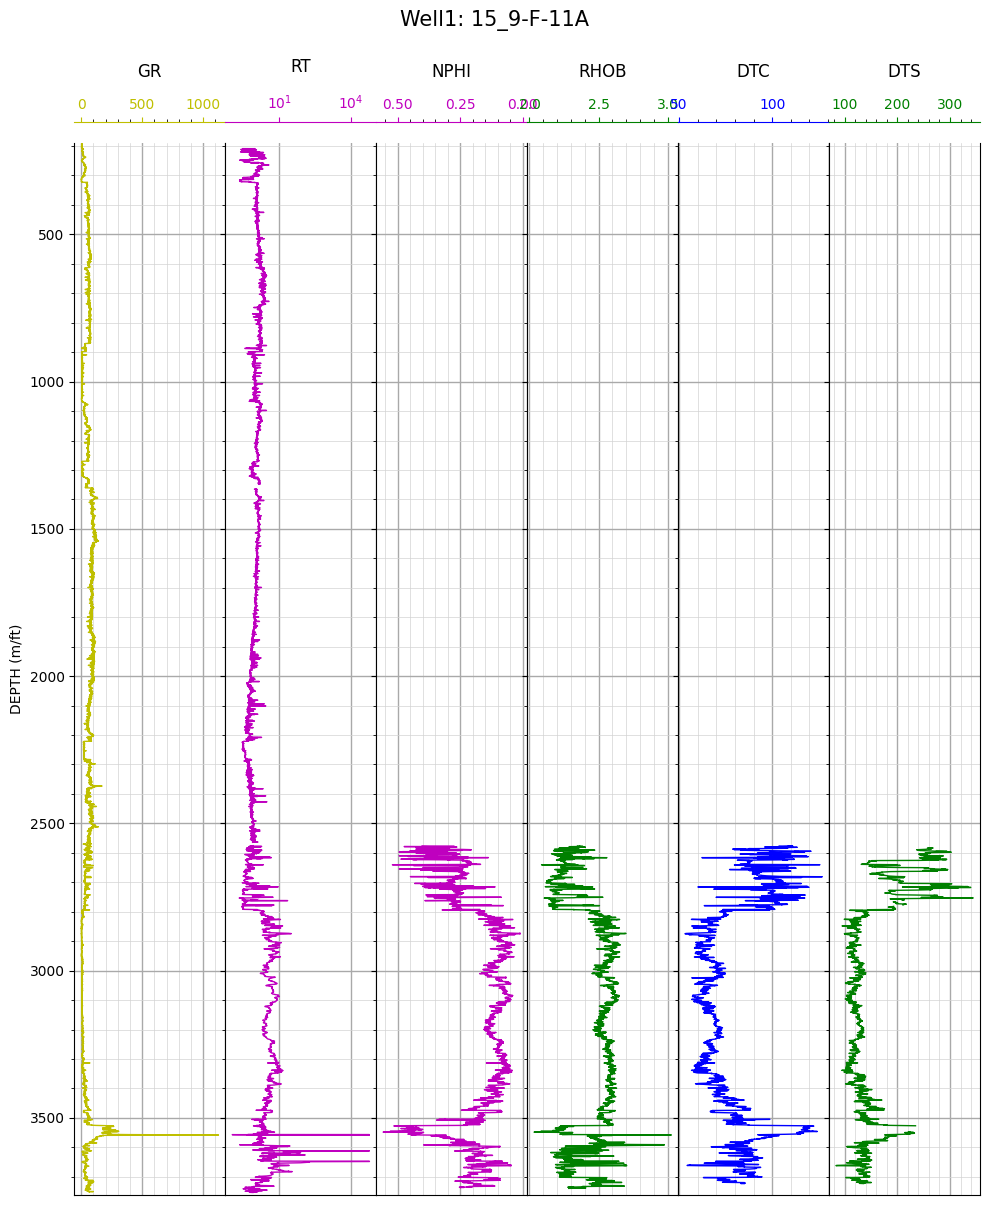

In [12]:
# Visualize individual well logs for well1 using the petrolib plotLog function. If you want to view logs for other wells, 
# you can modify the function to accommodate the respective well data.

plotLog(well1_df, depth='DEPTH', logs=well1_df.columns[1:], top=min(well1_df['DEPTH']), 
        bottom=max(well1_df['DEPTH']), figsize=(10,12), title='Well1: 15_9-F-11A')

>> ###  <center> DATA PREPARATION </center>


Data preparation plays a pivotal role in the machine learning pipeline. Just as data visualization is crucial for understanding data relationships, proper data preparation or data munging is essential to ensure optimal performance of machine learning models.

The process of data preparation is highly interactive and iterative. It typically involves the following steps:

* **Visualization** of the dataset to understand relationships and identify potential data issues.
* **Data cleaning and transformation** to address the identified problems. In many cases, step 1 is repeated to validate the effectiveness of the cleaning and transformation process.

In this analysis, the following tasks will be carried out:

* Filter well logs based on depth.
* Address missing values in the dataset.
* Trimm arbitrary well log values (outliers).
* Conduct well logs transformations.
* Utilize the petrolib library for visualizing and superimposing well logs

By performing these steps, we aim to enhance the quality of the data, ensuring that the subsequent machine learning model is based on reliable and meaningful information.

###### A. Filter Well logs

In [15]:
# This function takes a DataFrame containing well log data and a list of log names. It then finds the start and 
# end values of each log based oncertain conditions (non-missing values). The function returns a new DataFrame containing
# the start and end values of each log, which can be used to trim the well log data accordingly.

def trim_log_values(df, depth_column, log_list):

    """
    Pick the start and end values of multiple logs based on the given conditions.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the log data.
    column1 (str): The column from which to retrieve the values, 'DEPTH in this case'.
    log_list (list): A list of log names to determine the start and end of the logs.

    Returns:
    DataFrame: A pandas DataFrame containing the start and end values of each log.
    """
    trim_data = []
    
    for log in log_list:
        mask = df[log].notnull()  # Create a boolean mask where non-missing values in log are True
        start_index = mask.idxmax()  # Find the index of the first True value
        last_index = mask[::-1].idxmax()  # Find the index of the last True value by reversing the mask
        start_value = df.loc[start_index, depth_column]  # Retrieve the corresponding start value from column1(depth)
        end_value = df.loc[last_index, depth_column]  # Retrieve the corresponding end value from column1(depth)
        trim_data.append([log, start_value, end_value])
    
    trim_df = pd.DataFrame(trim_data, columns=['Log', 'Start Value', 'End Value'])
    return trim_df

In [16]:
print(trim_log_values(well1_df,'DEPTH', ['GR', 'RT', 'NPHI',  'RHOB','DTC', 'DTS'])) # trim well1
print('\n',trim_log_values(well2_df, 'DEPTH', ['GR', 'RT', 'NPHI',  'RHOB','DTC', 'DTS'])) # trim well2
print('\n',trim_log_values(well3_df, 'DEPTH', ['GR', 'RT',  'NPHI',  'RHOB','DTC', 'DTS'])) # trim well3
print('\n',trim_log_values(well4_df, 'DEPTH', ['GR', 'RT', 'NPHI',  'RHOB','DTC', 'DTS'])) # trim well4
print('\n',trim_log_values(well5_df, 'DEPTH', ['GR', 'RT', 'NPHI',  'RHOB','DTC', 'DTS'])) # trim well5
print('\n',trim_log_values(well6_df, 'DEPTH', ['GR', 'RT', 'NPHI',  'RHOB','DTC', 'DTS'])) # trim well6
print('\n',trim_log_values(well7_df, 'DEPTH', ['GR', 'RT', 'NPHI',  'RHOB','DTC', 'DTS'])) # trim well7

    Log  Start Value  End Value
0    GR        188.5     3751.3
1    RT        208.9     3753.4
2  NPHI       2577.0     3736.6
3  RHOB       2577.0     3739.4
4   DTC       2575.9     3723.3
5   DTS       2582.9     3723.1

     Log  Start Value  End Value
0    GR      184.310   1988.246
1    RT      193.126   1988.246
2  NPHI     1511.726   1965.142
3  RHOB     1511.726   1968.790
4   DTC     1484.214   1986.118
5   DTS     1504.582   1985.510

     Log  Start Value  End Value
0    GR     140.9528  2982.5928
1    RT     140.3448  2980.3128
2  NPHI    1349.0488  2968.3048
3  RHOB    1349.0488  2972.7128
4   DTC    1337.8008  2962.3768
5   DTS    1345.4008  2962.3768

     Log  Start Value  End Value
0    GR      263.627   4577.083
1    RT      275.939   4578.603
2  NPHI     3916.491   4560.211
3  RHOB     3917.403   4565.227
4   DTC     3587.867   4539.083
5   DTS     3588.019   4541.363

     Log  Start Value  End Value
0    GR      404.972   4958.436
1    RT      404.668   4939.892


In [17]:

well1 = well1_df.loc[(well1_df['DEPTH'] >=  2582.9 ) & (well1_df['DEPTH'] <= 3723.1)]
well2 = well2_df.loc[(well2_df['DEPTH'] >= 1511.726) & (well2_df['DEPTH'] <= 1965.142)]
well3 = well3_df.loc[(well3_df['DEPTH'] >= 1349.0488) & (well3_df['DEPTH'] <= 2962.3768)]
well4 = well4_df.loc[(well4_df['DEPTH'] >=  3916.491) & (well4_df['DEPTH'] <= 4539.083)]
well5 = well5_df.loc[(well5_df['DEPTH'] >=  1860.828) & (well5_df['DEPTH'] <= 4926.972)]
well6 = well6_df.loc[(well6_df['DEPTH'] >=  1150.087878) & (well6_df['DEPTH'] <= 2874.983878)]
well7 = well7_df.loc[(well7_df['DEPTH'] >=  1248.9716) & (well7_df['DEPTH'] <= 3202.9316)]


well1.shape, well2.shape, well3.shape, well4.shape, well5.shape,well6.shape,well7.shape

((11403, 7),
 (2984, 7),
 (10615, 7),
 (4097, 7),
 (20173, 7),
 (11348, 7),
 (12856, 7))

###### B. Deal with missing values

In [18]:
#checking for missing values

print(well1.isna().sum())
print('\n', well2.isna().sum())
print('\n', well3.isna().sum())
print('\n', well4.isna().sum())
print('\n', well5.isna().sum())
print('\n', well6.isna().sum())
print('\n', well7.isna().sum())

DEPTH      0
GR         0
RT         0
NPHI       0
RHOB       0
DTC        0
DTS      319
dtype: int64

 DEPTH    0
GR       0
RT       0
NPHI     0
RHOB     0
DTC      0
DTS      0
dtype: int64

 DEPTH      0
GR         0
RT         0
NPHI      38
RHOB     101
DTC        0
DTS       90
dtype: int64

 DEPTH    0
GR       0
RT       0
NPHI     4
RHOB     6
DTC      0
DTS      0
dtype: int64

 DEPTH       0
GR          2
RT          0
NPHI      331
RHOB     2055
DTC         0
DTS       935
dtype: int64

 DEPTH    0
GR       0
RT       0
NPHI     0
RHOB     0
DTC      0
DTS      0
dtype: int64

 DEPTH     0
GR        0
RT        0
NPHI      0
RHOB      0
DTC       0
DTS      54
dtype: int64


**After applying the function trim_log_values(), we have observed that there are still missing values in the log data, particularly in well5 for 'RHOB' and 'DTS' logs. This is likely due to gaps or breaks in the log readings, where the measurements were not continuous up to the end of the well.**

**To gain a better understanding of these gaps or breaks and devise appropriate solutions to handle the missing values, we will conduct a visual inspection of the log data, focusing on well5. This visual analysis will enable us to confirm the presence of gaps and assess their impact on the overall data quality.**

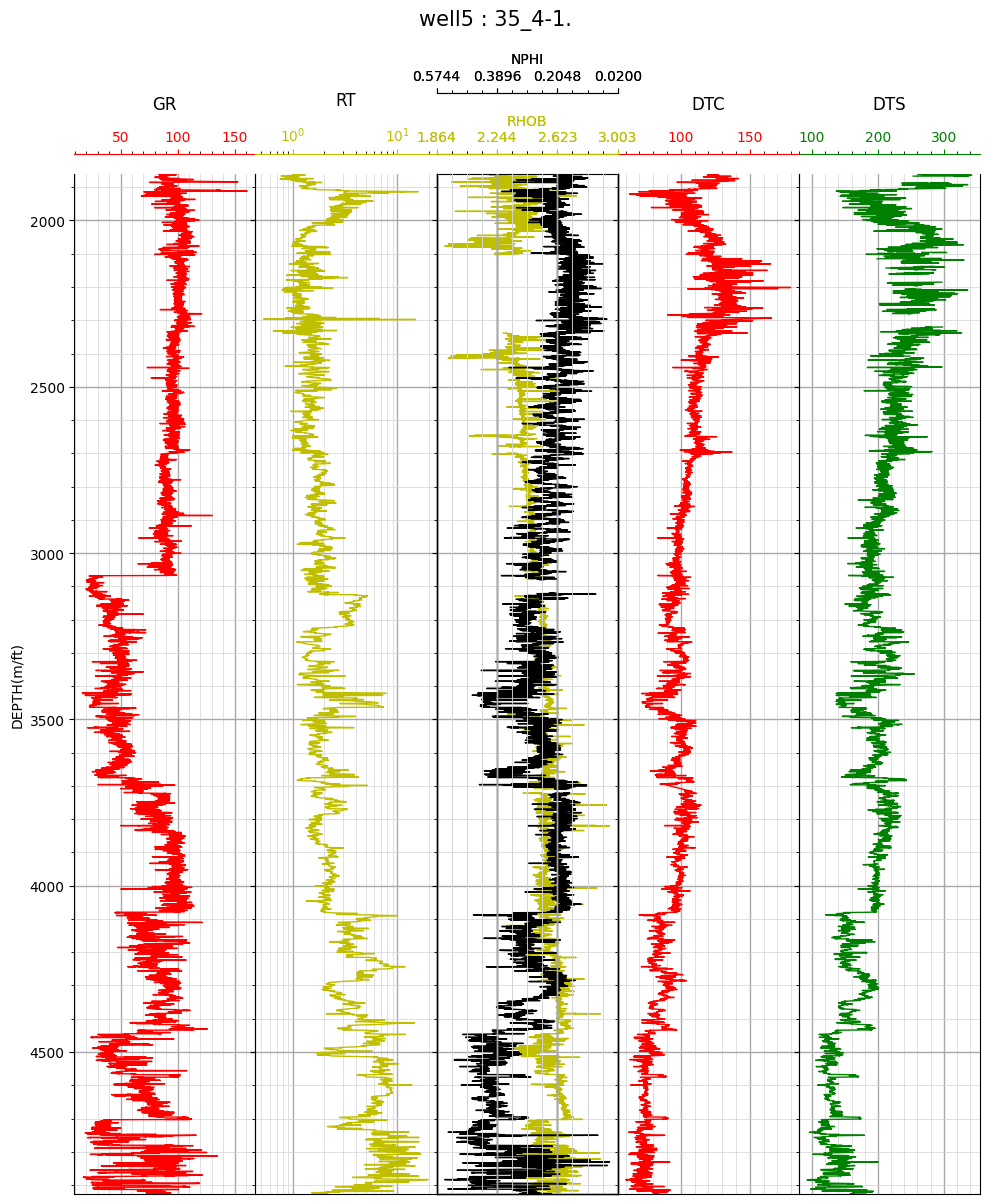

In [19]:
# Visualize individual well logs for well5 using the petrolib plotLogs function. If you want to view logs for other wells, 
# you can modify the function to accommodate the respective well data to check these gaps or breaks.


plotLogs(well5, depth='DEPTH', logs=['GR', 'RT', ['RHOB', 'NPHI'], 'DTC','DTS'], top=min(well5['DEPTH']), 
        bottom=max(well5['DEPTH']), figsize=(10,12), title='well5 : 35_4-1.')

**After conducting a thorough visual inspection, we have decided to address the missing values by dropping the affected data points. Our objective is to ensure a comprehensive and accurate dataset for further analysis and modeling in our machine learning project. By removing the rows with missing values, we can mitigate any potential biases or inaccuracies that may arise due to incomplete data.**

**The decision to drop the rows with missing data was made based on the relatively small percentage of data loss and the potential impact on the overall quality of the training set.
Dropping the missing values will allow us to work with a more reliable dataset, facilitating more robust analyses and enhancing the overall quality of our machine learning project. We will proceed with this data preprocessing step before delving into the modeling phase to ensure the best possible results and insights from our analysis.**

In [20]:
# Dropping the missing values

well1 = well1.dropna(how='any').reset_index(drop=True).sort_values('DEPTH')
well2 = well2.dropna(how='any').reset_index(drop=True).sort_values('DEPTH')
well3 = well3.dropna(how='any').reset_index(drop=True).sort_values('DEPTH')
well4 = well4.dropna(how='any').reset_index(drop=True).sort_values('DEPTH')
well5 = well5.dropna(how='any').reset_index(drop=True).sort_values('DEPTH')
well6 = well6.dropna(how='any').reset_index(drop=True).sort_values('DEPTH')
well7 = well7.dropna(how='any').reset_index(drop=True).sort_values('DEPTH')

Visually inspecting well5 again for missig values

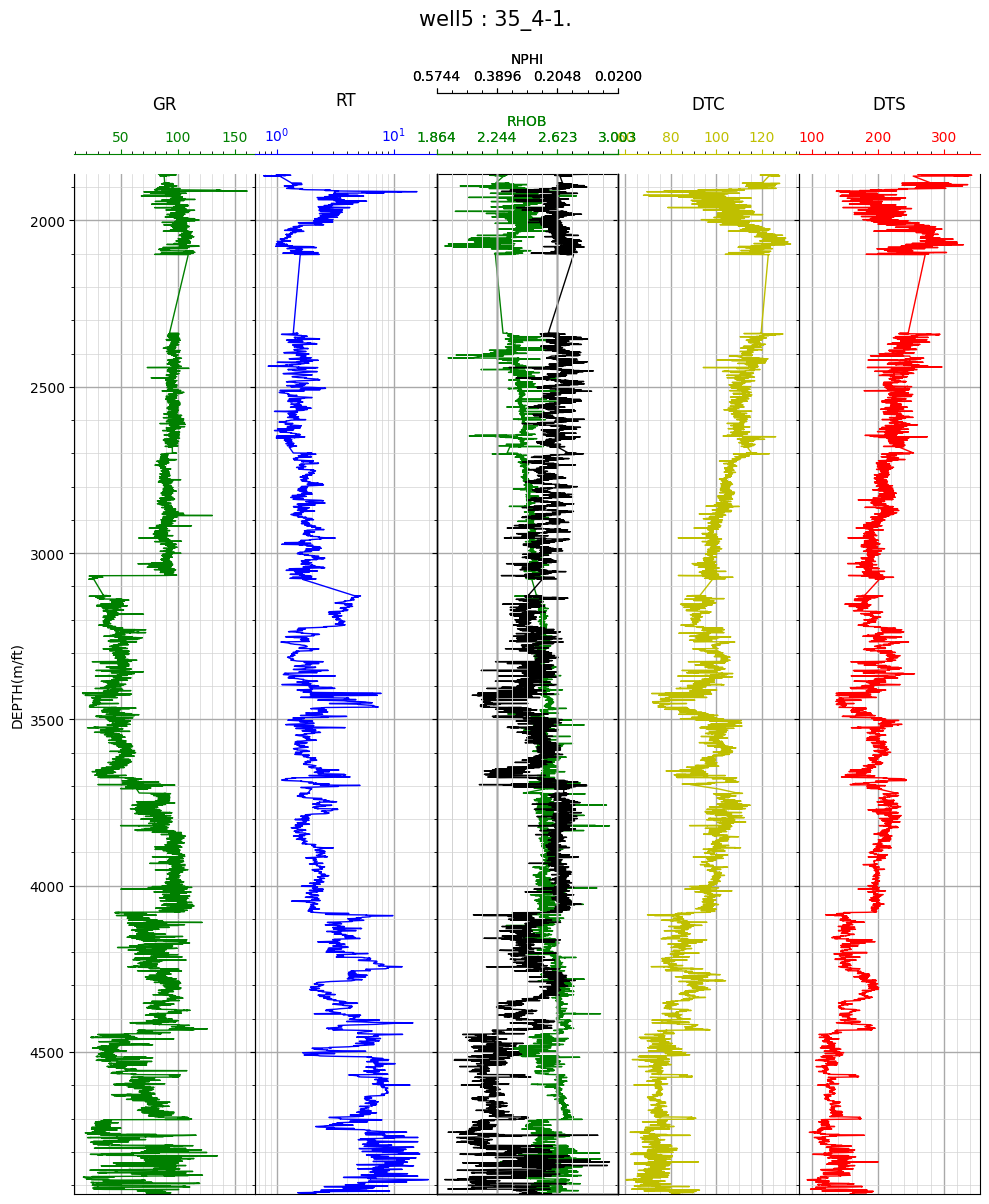

In [21]:
# Visualize individual well logs for well5 using the plotLogs function. If you want to view logs for other wells, 
# you can modify the function to accommodate the respective well data to check we don't these gaps or breaks again.

plotLogs(well5, depth='DEPTH', logs=['GR', 'RT', ['RHOB', 'NPHI'], 'DTC','DTS'], top=min(well5['DEPTH']), 
        bottom=max(well5['DEPTH']), figsize=(10,12), title='well5 : 35_4-1.')

From the initial data summary statistics and visually inspection, it is observed we have extreme values in the well logs (GR and RT). Our objective is not merely to train a machine learning model but to create a robust model that can effectively incorporate domain knowledge expertise, statistical validation, and simulate subsurface operations in its prediction process. Therefore, we need to address the issue of these extreme values in the GR well log, as they could potentially influence the performance and reliability of our model.

###### C. Outlier treatment

Handling outliers is a crucial step in data preprocessing, and it requires a thoughtful approach tailored to the specific dataset. There is no universal method to address outliers, as the most suitable technique often depends on domain expertise and the desired robustness of the model. In the context of this project, I have opted to replace all outliers with the maximum range values for each well log.

By replacing outliers with the maximum range values, we aim to retain valuable information while mitigating the potential impact of extreme data points on the overall analysis. This approach seeks to strike a balance between maintaining the integrity of the data and ensuring the model's stability and performance.

Before implementing this outlier handling strategy, we conducted a comprehensive examination of the dataset and considered the implications of various outlier treatment methods. The decision to use the maximum range values aligns with the specific characteristics of the dataset and the objectives of our machine learning project.

With the outliers addressed in this manner, we can proceed with further data analysis and modeling, confident that our preprocessing steps have fostered a more reliable and robust foundation for our machine learning endeavors.

In [22]:
# Replacing the outliers

well1['GR'] = np.where(well1['GR'] <= 200., well1['GR'], 200.)
well1['RT'] = np.where(well1['RT'] <= 2000., well1['RT'], 107.)

well2['GR'] = np.where(well2['GR'] <= 200., well2['GR'], 200.)
well2['RT'] = np.where(well2['RT'] <= 2000., well2['RT'], 107.)

well3['GR'] = np.where(well3['GR'] <= 200., well3['GR'], 200.)
well3['RT'] = np.where(well3['RT'] <= 2000., well3['RT'], 107.)

well4['GR'] = np.where(well4['GR'] <= 200., well4['GR'], 200.)
well4['RT'] = np.where(well4['RT'] <= 2000., well4['RT'], 107.)

well5['GR'] = np.where(well5['GR'] <= 200., well5['GR'], 200.)
well5['RT'] = np.where(well5['RT'] <= 2000., well5['RT'], 107.)

well6['GR'] = np.where(well6['GR'] <= 200., well6['GR'], 200.)
well6['RT'] = np.where(well6['RT'] <= 2000., well6['RT'], 107.)

well7['GR'] = np.where(well7['GR'] <= 200., well7['GR'], 200.)
well7['RT'] = np.where(well7['RT'] <= 2000., well7['RT'], 107.)


In [23]:
# Data summary statistics

well1.describe()
well2.describe()
well3.describe()
well4.describe()
well5.describe()
well6.describe()
well7.describe()

,DEPTH,GR,RT,NPHI,RHOB,DTC,DTS
count,12802.000000,12802.000000,12802.000000,12802.000000,12802.000000,12802.000000,12802.000000
mean,2228.578533,101.045774,4.753660,0.343166,2.379283,103.853402,234.078447
std,563.858934,23.463210,10.805373,0.100885,0.187890,24.129007,96.319060
min,1248.971600,46.754074,0.446237,0.040259,1.424735,51.734516,94.645958
25%,1743.617600,86.055662,1.165553,0.274245,2.222223,83.314693,154.502716
50%,2230.055600,99.452656,1.794531,0.332626,2.436037,101.763035,213.357445
75%,2716.493600,110.224977,5.322635,0.416190,2.533728,123.986908,296.515045
max,3202.931600,200.000000,418.023804,0.812641,3.163656,162.658585,590.718933


After carefully processing and visualizing the well logs, we have successfully addressed missing values, handled outliers, to ensure a balanced and consistent range of values. With these essential preprocessing steps completed, we are now ready to proceed with data transformation and scaling.

The issue of data scaling is crucial for achieving balanced and accurate predictions in machine learning. In our current dataset, some features exhibit significantly higher values compared to others. For instance, the 'RT' log ranges  0.103000 to 1057.321655, while 'RHOB' only varies from 1.248126 to 3.163656. This disparity in magnitude can lead to skewed data, where features with larger values may dominate the prediction process, potentially influencing the model's performance.

To ensure a Gaussian-like distribution and maintain consistent ranges for input features, it is essential to normalize or standardize the data. In this analysis, we will employ a straightforward standardization technique to center the data between 0 and 1. By doing so, we can ensure that all features are within a comparable range of values, avoiding any undue influence on the learning algorithm.

Furthermore, we will apply a log transformation to the 'RT' log since resistivity logs are typically recorded in logarithmic scale. This transformation will allow the algorithm to treat the 'RT' log appropriately, considering its inherent logarithmic nature.

It is important to note that data normalization or scaling might not always be necessary, as certain algorithms are inherently robust to varying feature scales. The decision to apply normalization will depend on the specific choice of algorithm and the nature of the data. By employing these preprocessing steps, we aim to enhance the model's learning process and ensure its ability to make accurate predictions in a wide range of scenarios.


#### D. Data Transformation

The aim of performing data transformation and scaling is to further enhance the model's ability to capture meaningful patterns and relationships within the data. This will contribute to the robustness and accuracy of our machine learning model, allowing us to make reliable predictions and gain valuable insights into the subsurface properties of the reservoir.

Here, we'll use the `sklearn.preprocessing.StandardScaler()` class to standardize the data. $$z = (x - \mu) \over \sigma $$ Where $ \mu $ is mean and $ \sigma $ is standard deviation

We will combine the data from the seven(7) wells into a single dataset to simplify and streamline the data 
preprocessing process. This will allow us to perform consistent data cleaning, transformation, and scaling operations 
on the entire dataset, ensuring that all logs are treated uniformly. By merging the well data, we can leverage the 
full range of information from multiple wells, potentially leading to improved model performance and capturing 
valuable inter-well relationships. 

In [24]:
# Combine the seven wells dataset for easy preprocessing

welldata = pd.concat((well1, well2,well3,well4,well5,well6,well7), axis='index').reset_index(drop=True)

welldata.shape

(70647, 7)

In [25]:
# Transform RT values to the conventional logrithm values

welldata['RT'] = np.log10(welldata['RT'])

In [26]:
# Standardize the features(train data)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = welldata.drop(['DTC','DTS'], axis=1)
target = welldata[['DTC','DTS']]

new_welldata = scaler.fit_transform(features)


In [27]:
# View the standardized features

new_df = pd.DataFrame(new_welldata, columns=features.columns)
new_df

,DEPTH,GR,RT,NPHI,RHOB
0,-0.178742,-0.474512,-1.170970,0.426924,-0.532269
1,-0.178634,-0.422780,-1.183571,0.525264,-0.537962
2,-0.178527,-0.368812,-1.282275,0.574434,-0.560735
3,-0.178419,-0.414096,-1.363914,0.549849,-0.611975
4,-0.178312,-0.534815,-1.437855,0.410534,-0.691681
...,...,...,...,...,...
70642,0.486881,0.411939,0.077121,-0.933516,-0.182248
70643,0.487045,0.401446,0.359905,-0.894203,-0.116095
70644,0.487208,0.386270,0.323048,-0.870849,-0.111746
70645,0.487371,0.419523,0.000026,-0.893547,-0.161651


In [28]:
# View both the standardized features and the non-standardized target together

new_df['DTC'] = target['DTC']
new_df['DTS'] = target['DTS']

new_df

,DEPTH,GR,RT,NPHI,RHOB,DTC,DTS
0,-0.178742,-0.474512,-1.170970,0.426924,-0.532269,107.067000,261.036000
1,-0.178634,-0.422780,-1.183571,0.525264,-0.537962,107.810000,260.161000
2,-0.178527,-0.368812,-1.282275,0.574434,-0.560735,108.231000,261.067000
3,-0.178419,-0.414096,-1.363914,0.549849,-0.611975,108.428000,262.510000
4,-0.178312,-0.534815,-1.437855,0.410534,-0.691681,108.222000,263.360000
...,...,...,...,...,...,...,...
70642,0.486881,0.411939,0.077121,-0.933516,-0.182248,77.275360,128.180420
70643,0.487045,0.401446,0.359905,-0.894203,-0.116095,77.164352,128.340118
70644,0.487208,0.386270,0.323048,-0.870849,-0.111746,77.014763,127.718094
70645,0.487371,0.419523,0.000026,-0.893547,-0.161651,77.200363,126.800697


In [29]:
# Divide the welldata back to train and test, since we are done standardizing our features

train = new_df.iloc[:len(well1)+ len(well2)+ len(well3)+ len(well4) + len(well5) + len(well6)]
test = new_df.iloc[len(well1)+ len(well2)+ len(well3)+ len(well4) + len(well5) + len(well6):]

train.shape, test.shape

((57845, 7), (12802, 7))

In [30]:
# Separate the features and target variables

train_x = train.drop(['DTC','DTS'], axis=1)
train_y = train[['DTC', 'DTS']]

test_x = test.drop(['DTC','DTS'], axis=1)
test_y = test[['DTC','DTS']]


>> ###  <center> MODEL BUILDING AND TRAINING </center>

Lastly, we proceed to build our model, leveraging the power of an ensemble approach. Specifically, we will employ the Random Forest algorithm, which serves as a meta estimator by fitting multiple randomized trees on different subsets of the dataset and utilizing averaging to enhance predictive accuracy while mitigating overfitting. Additionally, we are using the ExtraTreesRegressor variant, which is also an ensemble method based on the Random Forest algorithm.



Random Forest is widely regarded as a baseline model within the geoscience community due to its robustness and effectiveness in handling various data complexities and non-linearities commonly encountered in our domain. ExtraTreesRegressor, with its multiple decision trees and averaging predictions, further contributes to the model's effectiveness.

Ensemble models have proven to be valuable in our context as they offer a reliable means to tackle intricate geological patterns and relationships present in the data. By leveraging the collective insights of multiple trees and employing averaging techniques, these models excel at capturing subtle interactions and delivering more accurate predictions.

With the Random Forest ensemble in place, we are well-equipped to address the challenges posed by the geoscience dataset and derive meaningful conclusions from the complex relationships inherent in the data. This model selection aligns with the requirements of our machine learning project and holds promise in providing valuable insights for further geological analysis and decision-making.

**Hyperparameters**
* `n_estimators` : number of trees
* `max_dpeth` : depth to which each tree should grow
* `bootstrap` : randomnly samples the data in subset batches during training
* `random_state` : for model reproducibility
* `verbose` : output the tree-building process during training 

**Based on domain expertise and careful consideration, I have made the deliberate choice to utilize only five essential hyperparameters: n_estimators, max_depth, bootstrap, random_state, and verbose. This decision aims to strike a balance between model complexity and performance efficiency. By focusing on these key hyperparameters, we can ensure a streamlined and effective model that achieves a good level of performance without unnecessary complexities, resulting in efficient running time during deployment.**

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
from util import print_metrics

model = ExtraTreesRegressor(n_estimators=100, max_depth=12,
                              bootstrap=True, random_state=42, verbose=2)

model.fit(train_x, train_y)

test_prediction = model.predict(test_x)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.0s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


#### Model Evaluation

As this is a supervised machine learning regression task, the following evaluation metrics can be used to evaluate the model.

* $ R^2 $ score
* Mean Squared Error
* Root mean squared error
* Mean Absolute error

In [32]:
# Import and check the model performance

from util import print_metrics
print_metrics(test_y, test_prediction)

R^2                    = 0.9218014471619802
Mean Square Error      = 414.667509892206
Root Mean Square Error = 20.36338650353143
Mean Absolute Error    = 12.598238240561797


 ##### <span style="color: red;"> We have achieved an impressive model accuracy of 92.2%, which is truly remarkable. Now, it's time to compare our true well log values with the predicted well log values. We will carefully examine both the dataframes and visual plots to gain deeper insights into the model's performance and identify any differences in the range between the two sets of values. This analysis will provide valuable information to further evaluate and fine-tune our model for optimal performance.</span>

**View the Binary Prediction Results for both Compressional (DTC) and Shear (DTS) Sonic Logs ('Pred DTC' and 'Pred DTS') in Well7**

In [33]:
well7[['Pred DTC', 'Pred DTS']] = test_prediction

well7

,DEPTH,GR,RT,NPHI,RHOB,DTC,DTS,Pred DTC,Pred DTS
0,1248.9716,97.526703,1.011359,0.668820,1.803113,159.394608,466.184387,153.348013,515.742218
1,1249.1236,100.388199,1.011185,0.641756,1.826986,159.974411,466.584991,153.318222,507.571318
2,1249.2756,101.783859,1.047923,0.641063,1.788624,160.734726,480.244598,152.820650,504.966378
3,1249.4276,102.614487,1.074503,0.671035,1.736997,159.246780,493.747528,152.402468,502.802295
4,1249.5796,103.685036,1.062204,0.735416,1.717516,158.052307,493.747528,152.278463,502.740016
...,...,...,...,...,...,...,...,...,...
12797,3202.3236,86.526291,2.461581,0.185992,2.387479,77.275360,128.180420,81.840712,146.502175
12798,3202.4756,86.155312,3.192825,0.190789,2.399099,77.164352,128.340118,81.796747,147.374159
12799,3202.6276,85.618744,3.086398,0.193639,2.399863,77.014763,127.718094,82.258240,148.656768
12800,3202.7796,86.794403,2.293071,0.190869,2.391097,77.200363,126.800697,82.350163,148.677960


**Visual plot of the Binary Prediction Results for both Compressional (DTC) and Shear (DTS) Sonic Logs ('Pred DT' and 'Pred DTS') in Well7**

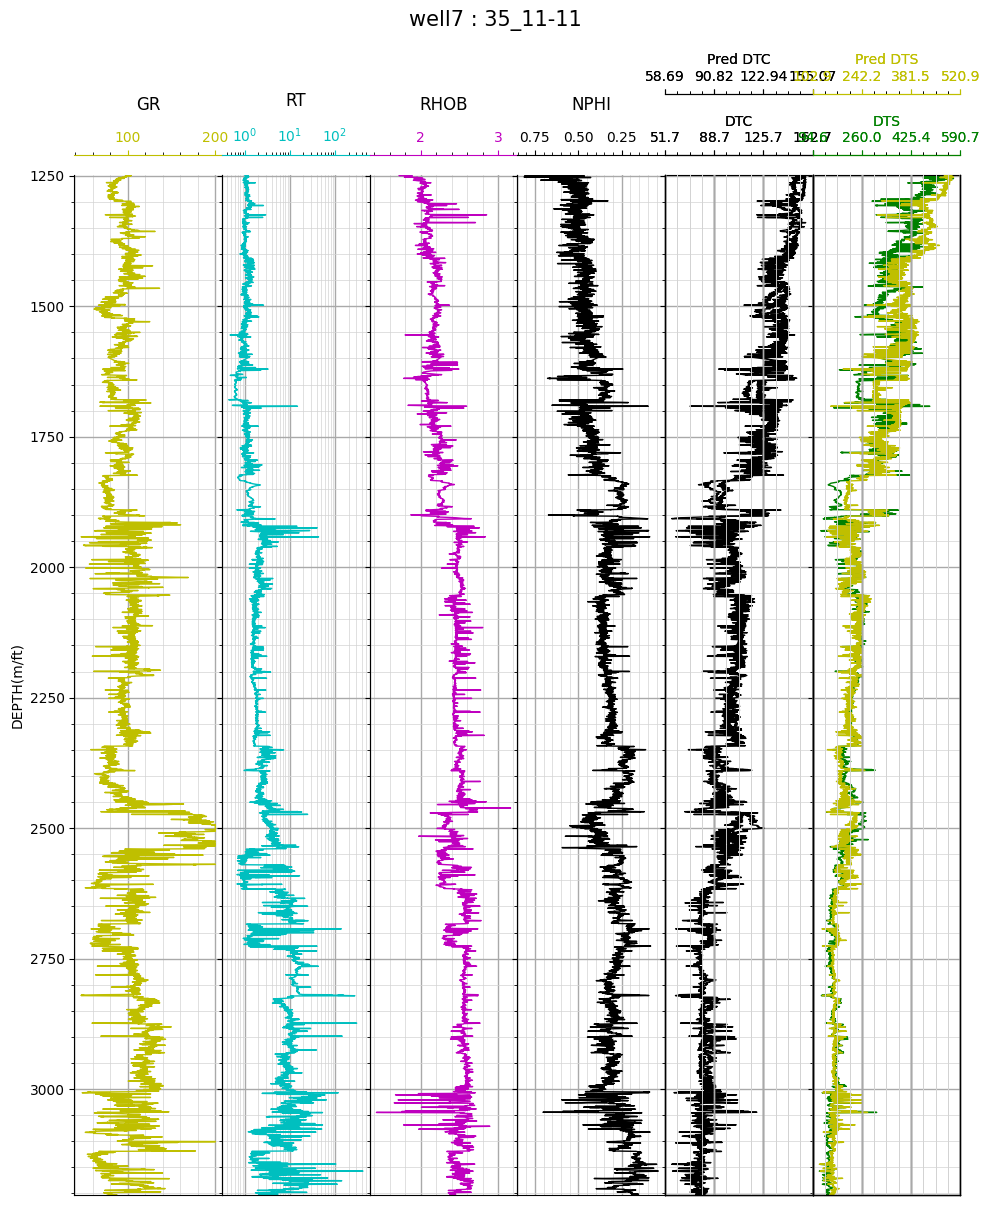

In [34]:
plotLogs(well7, depth='DEPTH', logs=['GR', 'RT', 'RHOB', 'NPHI', ['DTC', 'Pred DTC'], ['DTS', 'Pred DTS']], 
         top=min(well7['DEPTH']), bottom=max(well7['DEPTH']), figsize=(10,12), title='well7 : 35_11-11')

##### <span style="color: blue;">Utilizing the capabilities of petrolib, we have successfully superimposed the (DTC and predicted DTC) as well as (DTS and predicted DTS) to assess the accuracy of our predicted log values against the actual log values visually. Upon careful examination, we observe that while there are instances of slight overfitting and underfitting, with average discrepancies of +/-12, the majority of our model's predictions exhibit a remarkable level of precision, indicating its high performance. Overall, our model demonstrates excellent fitting capabilities, reflecting its effectiveness in capturing the relationships between the variables and yielding reliable outcomes..</span>


**Model Optimization**

In [35]:
# Get all the parameters available to improve the model

model.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 2,
 'warm_start': False}

_Auto Hyperparameter Optimization using Optuna_

#Automatic Hyperparameter Optimization using Optuna 

import optuna
import random
import sklearn 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import cross_val_score


def objective(trial):

    # Define the search space for the hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = int(trial.suggest_float('max_depth', 5, 15, log=True))
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    random_state = trial.suggest_int('random_state', 0, 100)
    verbose = trial.suggest_int('verbose', 0, 2)
    #max_features = trial.suggest_uniform('max_features', 0.1, 1.0) 
    #min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    

    # Create the ExtraTreeRegressor model
    clf = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=max_depth,
                              bootstrap=bootstrap, random_state=random_state, verbose=verbose)

    # Evaluate the model using cross-validation
    scores = cross_val_score(clf, train_x, train_y, n_jobs=-1, cv=5, scoring='r2')
    return scores.mean()

###### Create an Optuna study
study = optuna.create_study(direction='maximize')

###### Start the optimization process, running 100 trials
study.optimize(objective, n_trials=100)

###### Access the best set of hyperparameters found during the optimization
best_params = study.best_params
best_value = study.best_value

###### Print the results
print("Best Parameters:", best_params)
print("Best Value (Average R2 Score):", best_value)


study.best_params 

In [37]:
# Hyperparameters from optuna optimization

model_opt = ExtraTreesRegressor(n_estimators=111, max_depth=10, bootstrap = True, random_state=91, verbose=0)

model_opt.fit(train_x, train_y)

test_prediction2 = model_opt.predict(test_x)

In [38]:
# Check the model performance

print_metrics(test_y, test_prediction2)

R^2                    = 0.9198309424268549
Mean Square Error      = 422.0236862107942
Root Mean Square Error = 20.543215089435105
Mean Absolute Error    = 13.034769552791445


##### <span style="color: blue;">After carefully comparing the model results with and without hyperparameter tuning optimization, which achieved accuracies of 91.6% and 92.2%, respectively, it is evident that there is only a minimal difference in their performance. However, considering the complexity and time taken for hyperparameter tuning optimization, we have made the decision to proceed with deploying our first model (92.2%), which was trained without hyperparameter optimization. This choice is based on the marginal improvement achieved by the first model over the optimized model, making it more practical for deployment. The first model with an accuracy of 92.2% has demonstrated promising results and will be more than sufficient for our deployment needs.</span>

**Model Deployment**

_Save the ML model_

In [39]:
import joblib

def save_model(model, filename):
    """
    Save a trained scikit-learn model to disk using joblib.
    """
    try:
        joblib.dump(model, filename)
        print(f"Model saved to {filename}")
    except Exception as e:
        print(f"Error saving model to {filename}: {e}")

save_model(model, 'models/sonic-logs_Binary_model.joblib')


Model saved to models/sonic-logs_Binary_model.joblib
